In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import io
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import regularizers
import warnings
warnings.filterwarnings('ignore')

# Data Exploration

In [2]:
from IPython.display import display
import ipywidgets as widgets

upload_widget = widgets.FileUpload()
display(upload_widget)

FileUpload(value=(), description='Upload')

In [4]:
uploaded_file = upload_widget.value
file_content = uploaded_file[0]['content']


df = pd.read_csv(io.BytesIO(file_content))

- Country: Country
- Year: Year from 2000 to 2015
- Status: Developed or Developing
- Life expectancy: Life expectancy in age
- Adult Mortality: Adult Mortality Rates of both sexes (probability of dying between 15 and 60 years per 1000 population)
- infant deaths: Number of Infant Deaths per 1000 population
- Alcohol: Alcohol, recorded per capita (15+) consumption (in litres of pure alcohol) 
- percentage expenditure: Expenditure on health as a percentage of Gross Domestic Product per capita(%)
- Hepatitis B: Hepatitis B (HepB) immunization coverage among 1-year-olds (%)
- Measles: Number of reported cases per 1000 population
- BMI: Average Body Mass Index of entire population
- under-five deaths: Number of under-five deaths per 1000 population
- Polio: Immunization coverage among 1-year-olds (%)
- Total expenditure: General government expenditure on health as a percentage of total government expenditure (%)
- Diphtheria: Diphtheria tetanus toxoid and pertussis (DTP3) immunization coverage among 1-year-olds (%)
- HIV/AIDS: Deaths per 1 000 live births HIV/AIDS (0-4 years)
- GDP: Gross Domestic Product per capita (in USD)
- Population: Population of the country
- thinness 1-19 years: Prevalence of thinness among children and adolescents for Age 10 to 19 (%)
- thinness 5-9 years: Prevalence of thinness among children for Age 5 to 9(%)
- Income composition of resources: Human Development Index in terms of income composition of resources (index ranging from 0 to 1)
- Schooling: Number of years of Schooling (years)

In [5]:
df

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [6]:
df.shape

(2938, 22)

In [7]:
df.columns.values.tolist()

['Country',
 'Year',
 'Status',
 'Life expectancy ',
 'Adult Mortality',
 'infant deaths',
 'Alcohol',
 'percentage expenditure',
 'Hepatitis B',
 'Measles ',
 ' BMI ',
 'under-five deaths ',
 'Polio',
 'Total expenditure',
 'Diphtheria ',
 ' HIV/AIDS',
 'GDP',
 'Population',
 ' thinness  1-19 years',
 ' thinness 5-9 years',
 'Income composition of resources',
 'Schooling']

In [8]:
df = df.rename(columns={
    'Life expectancy ': 'Life expectancy', 
    'Measles ': 'Measles',
    ' BMI ': 'BMI',
    'under-five deaths ': 'under-five deaths',
    'Diphtheria ': 'Diphtheria',
    ' HIV/AIDS': 'HIV/AIDS',
    ' thinness  1-19 years': 'thinness 10-19 years',
    ' thinness 5-9 years': 'thinness 5-9 years'
})

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10  BMI                              2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [10]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Year,2938.0,2.007519e+03,4.613841e+00,2000.00000,2004.000000,2.008000e+03,2.012000e+03,2.015000e+03
Life expectancy,2928.0,6.922493e+01,9.523867e+00,36.30000,63.100000,7.210000e+01,7.570000e+01,8.900000e+01
Adult Mortality,2928.0,1.647964e+02,1.242921e+02,1.00000,74.000000,1.440000e+02,2.280000e+02,7.230000e+02
infant deaths,2938.0,3.030395e+01,1.179265e+02,0.00000,0.000000,3.000000e+00,2.200000e+01,1.800000e+03
Alcohol,2744.0,4.602861e+00,4.052413e+00,0.01000,0.877500,3.755000e+00,7.702500e+00,1.787000e+01
percentage expenditure,2938.0,7.382513e+02,1.987915e+03,0.00000,4.685343,6.491291e+01,4.415341e+02,1.947991e+04
Hepatitis B,2385.0,8.094046e+01,2.507002e+01,1.00000,77.000000,9.200000e+01,9.700000e+01,9.900000e+01
Measles,2938.0,2.419592e+03,1.146727e+04,0.00000,0.000000,1.700000e+01,3.602500e+02,2.121830e+05
BMI,2904.0,3.832125e+01,2.004403e+01,1.00000,19.300000,4.350000e+01,5.620000e+01,8.730000e+01
under-five deaths,2938.0,4.203574e+01,1.604455e+02,0.00000,0.000000,4.000000e+00,2.800000e+01,2.500000e+03


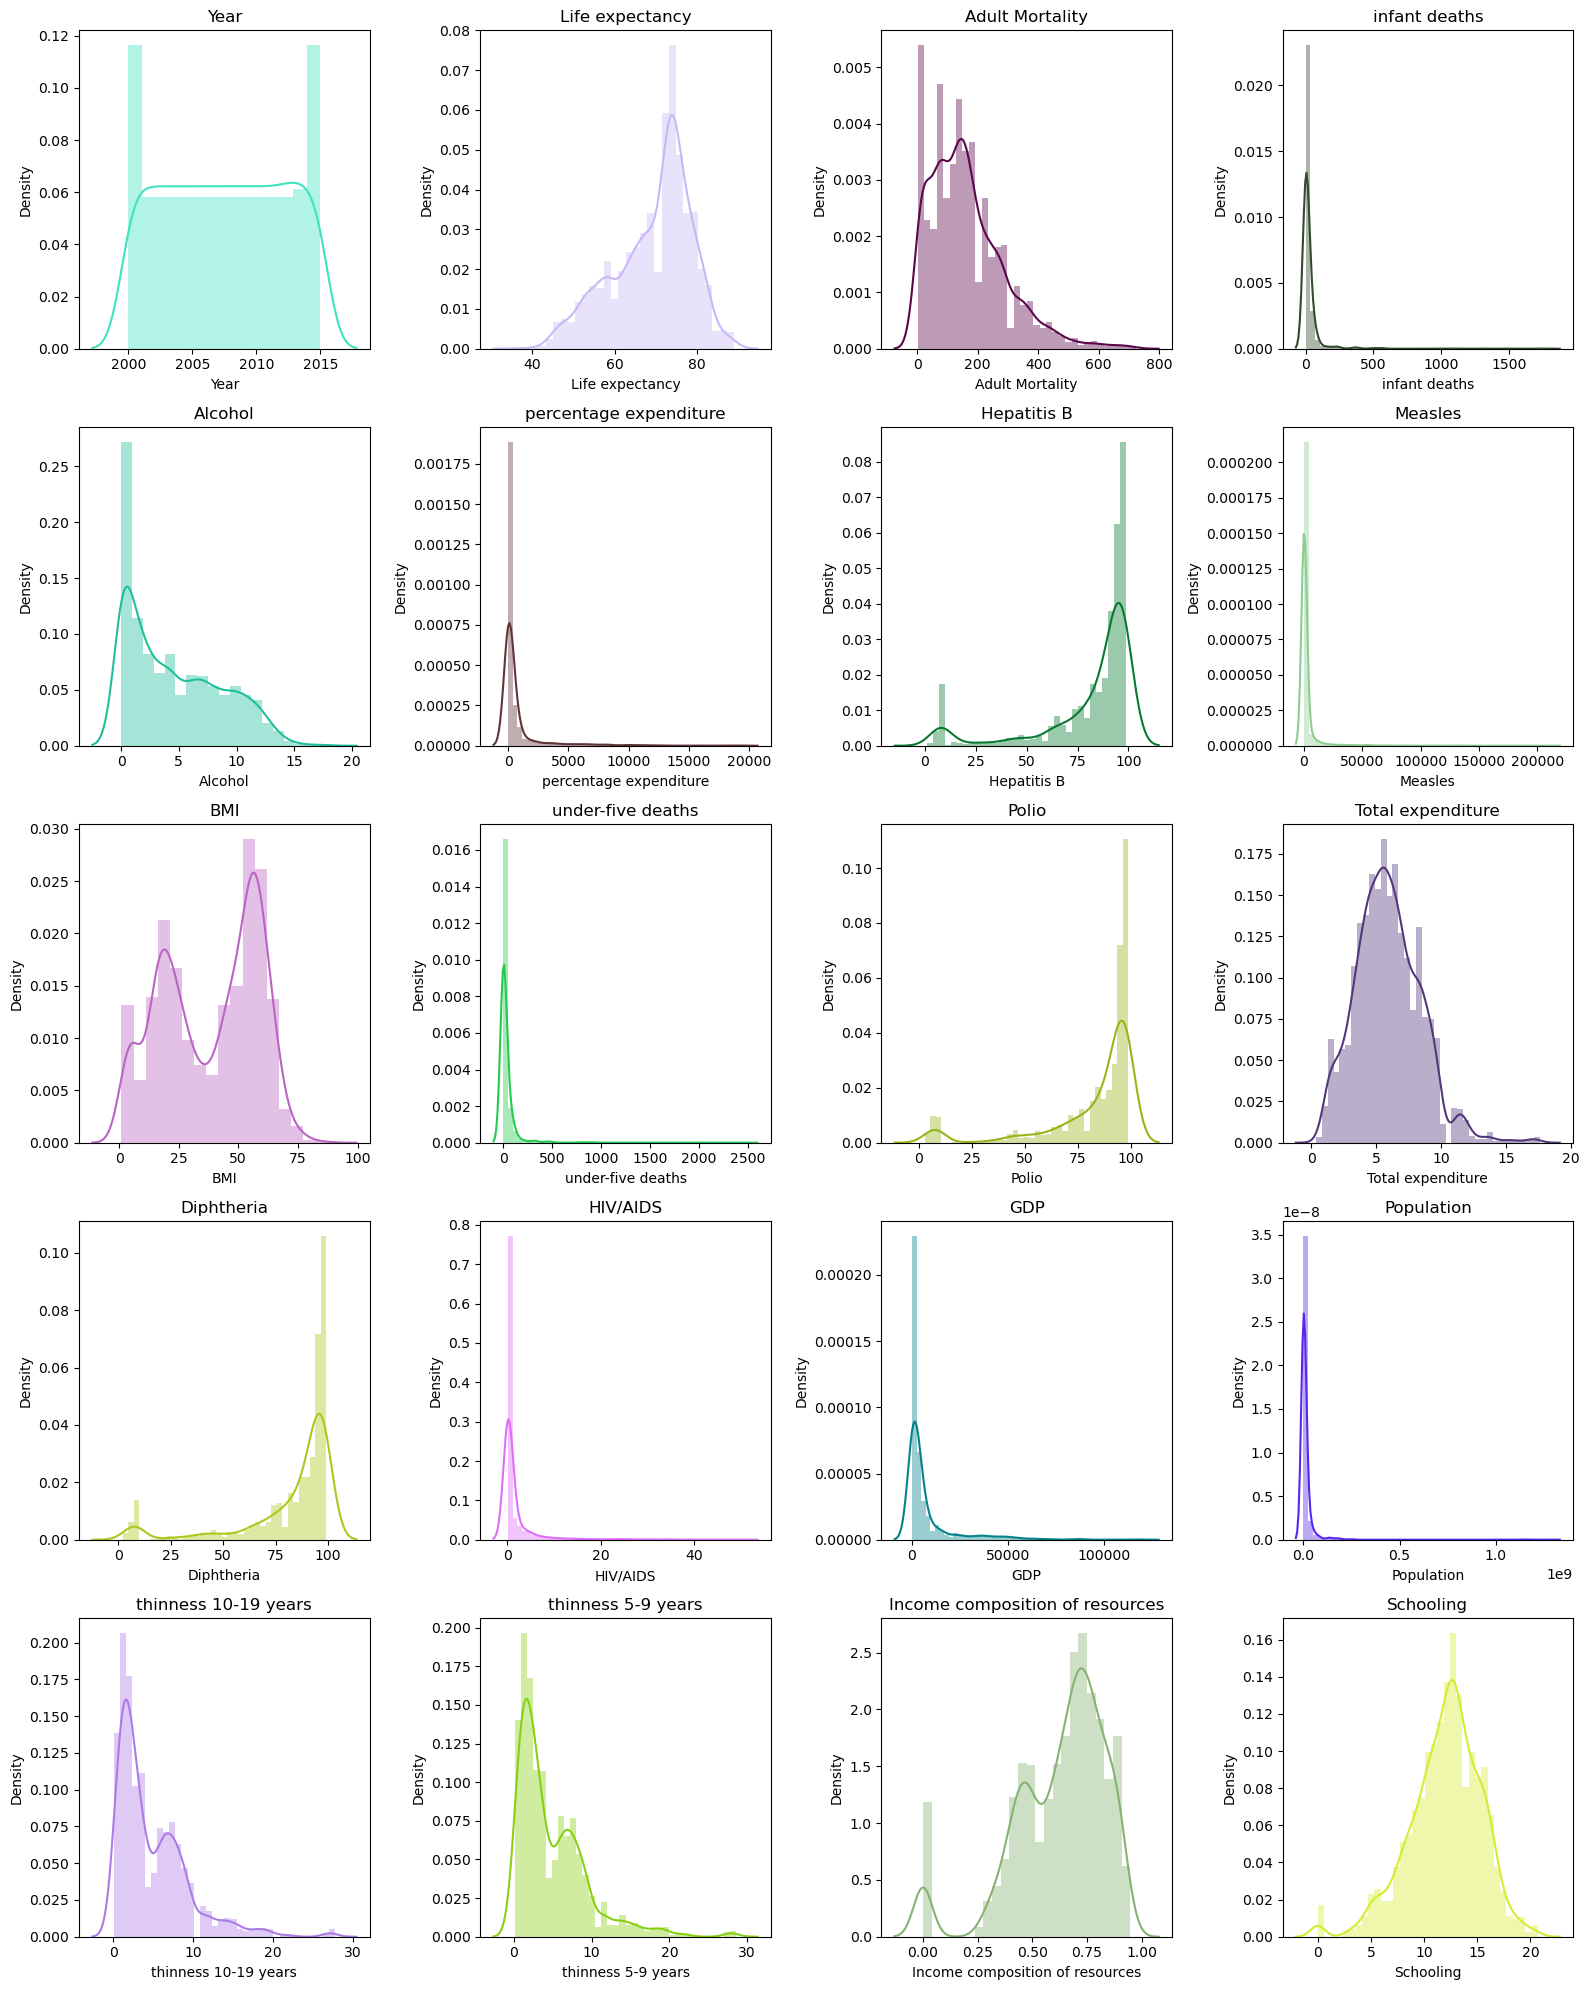

In [11]:
import random

def rand_color():
    return "#" + "".join([random.choice('0123456789ABCDEF') for _ in range(6)])

numerical_columns = df.select_dtypes(include=[np.number]).columns.tolist()

num_cols = len(numerical_columns)
num_rows = num_cols // 4
num_rows += num_cols % 4
position = range(1, num_cols + 1)

fig = plt.figure(figsize=(16, num_rows * 4))

for k, col in zip(position, numerical_columns):
    ax = fig.add_subplot(num_rows, 4, k)
    sns.distplot(df[col], color=rand_color(), ax=ax)
    ax.set_title(col)

plt.tight_layout()
plt.show()

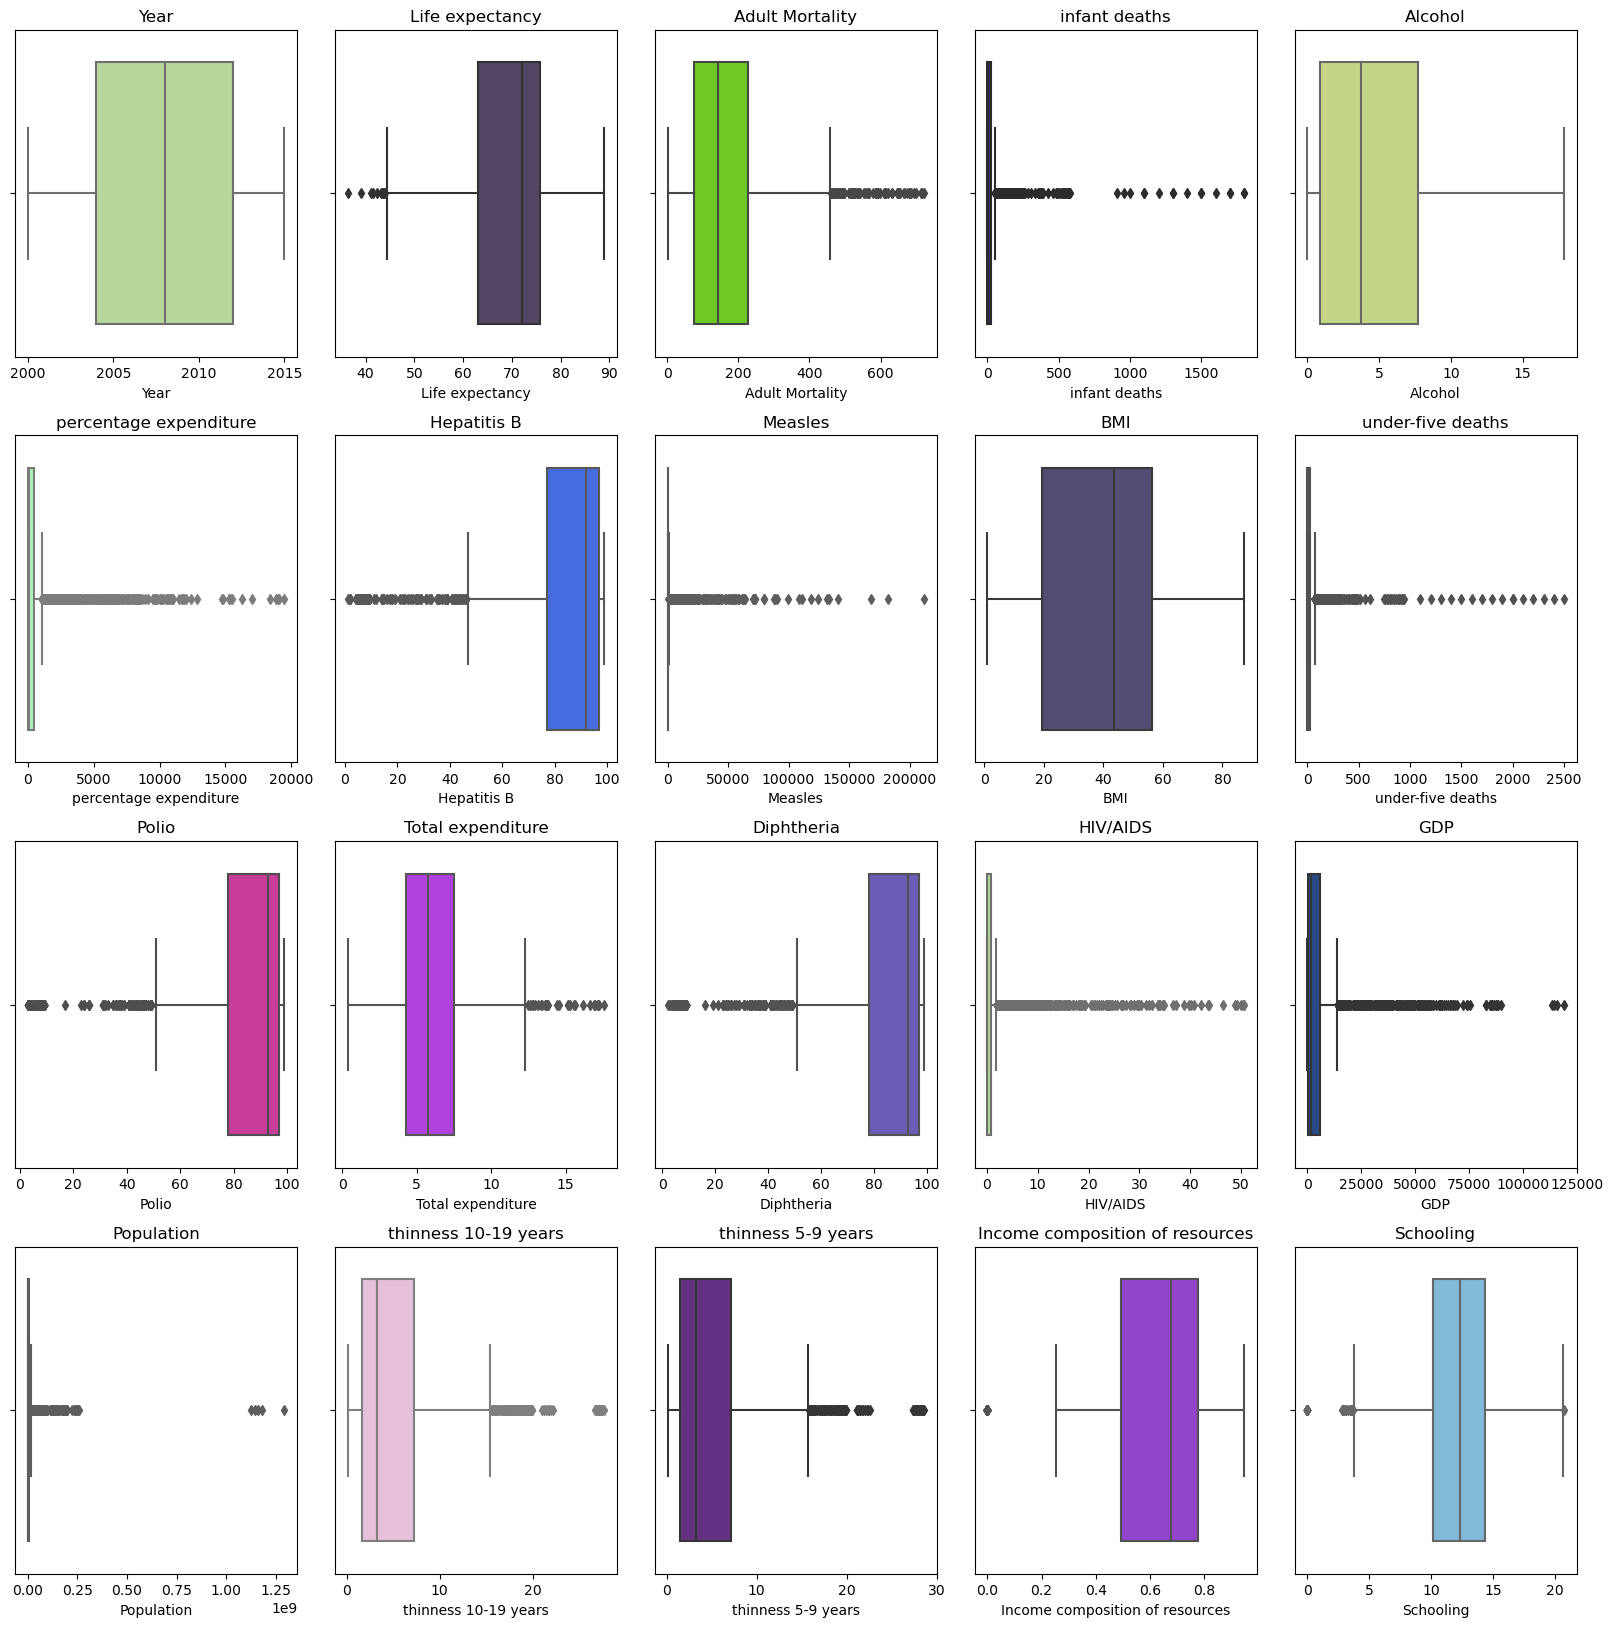

In [12]:
fig = plt.figure(figsize=(16, num_rows * 4))

for k, col in zip(position, numerical_columns):
    ax = fig.add_subplot(num_rows, 5, k)
    sns.boxplot(x=df[col], ax=ax, color=rand_color())
    ax.set_title(col)

plt.tight_layout()
plt.show()

In [13]:
numeric_columns = df.select_dtypes(include='number').columns
df_numeric = df[numeric_columns]

In [14]:
corr_matrix = df_numeric.corr()

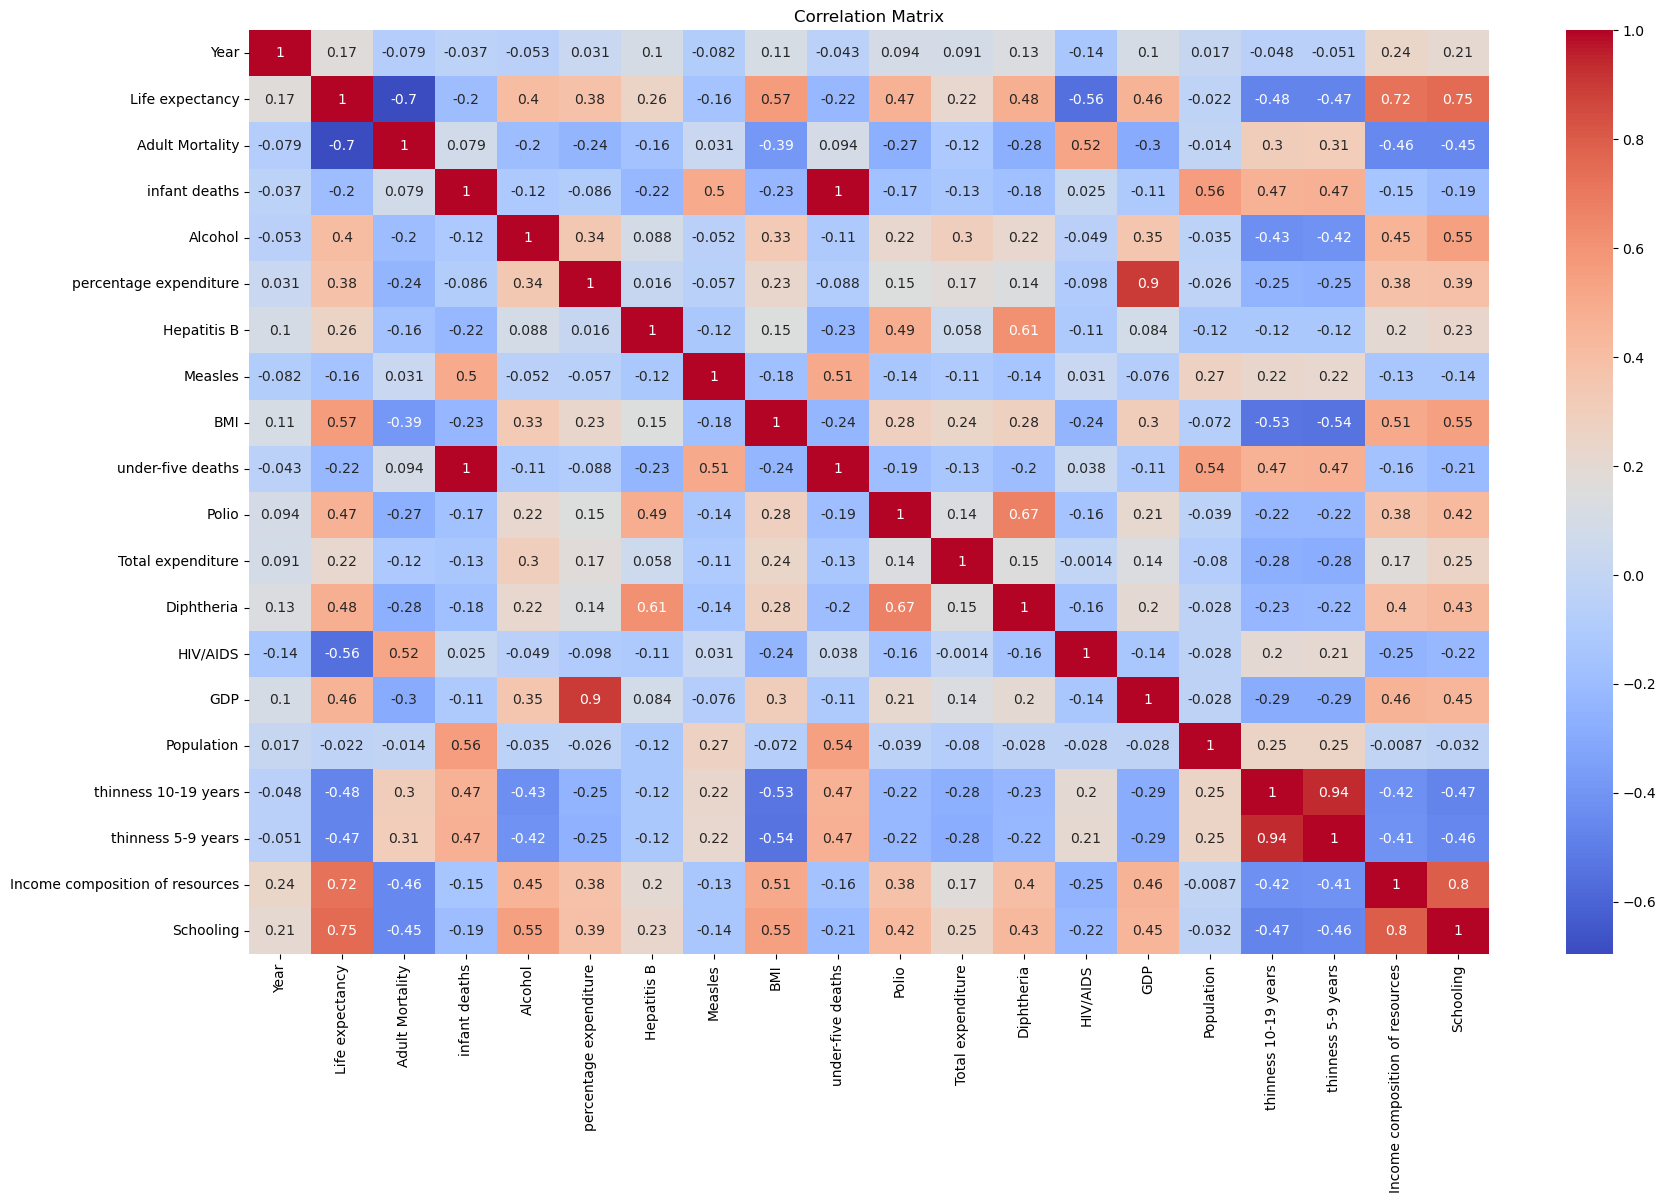

In [15]:
plt.figure(figsize=(20, 12))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Data Preprocessing

In [16]:
df.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
BMI                                 34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
HIV/AIDS                             0
GDP                                448
Population                         652
thinness 10-19 years                34
thinness 5-9 years                  34
Income composition of resources    167
Schooling                          163
dtype: int64

In [17]:
df[df['Life expectancy'].isnull()]

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 10-19 years,thinness 5-9 years,Income composition of resources,Schooling
624,Cook Islands,2013,Developing,NaN,NaN,0,0.01,0.000000,98.0,0,...,98.0,3.58,98.0,0.1,NaN,NaN,0.1,0.1,NaN,NaN
769,Dominica,2013,Developing,NaN,NaN,0,0.01,11.419555,96.0,0,...,96.0,5.58,96.0,0.1,722.756650,NaN,2.7,2.6,0.721,12.7
1650,Marshall Islands,2013,Developing,NaN,NaN,0,0.01,871.878317,8.0,0,...,79.0,17.24,79.0,0.1,3617.752354,NaN,0.1,0.1,NaN,0.0
1715,Monaco,2013,Developing,NaN,NaN,0,0.01,0.000000,99.0,0,...,99.0,4.30,99.0,0.1,NaN,NaN,NaN,NaN,NaN,NaN
1812,Nauru,2013,Developing,NaN,NaN,0,0.01,15.606596,87.0,0,...,87.0,4.65,87.0,0.1,136.183210,NaN,0.1,0.1,NaN,9.6
1909,Niue,2013,Developing,NaN,NaN,0,0.01,0.000000,99.0,0,...,99.0,7.20,99.0,0.1,NaN,NaN,0.1,0.1,NaN,NaN
1958,Palau,2013,Developing,NaN,NaN,0,NaN,344.690631,99.0,0,...,99.0,9.27,99.0,0.1,1932.122370,292.0,0.1,0.1,0.779,14.2
2167,Saint Kitts and Nevis,2013,Developing,NaN,NaN,0,8.54,0.000000,97.0,0,...,96.0,6.14,96.0,0.1,NaN,NaN,3.7,3.6,0.749,13.4
2216,San Marino,2013,Developing,NaN,NaN,0,0.01,0.000000,69.0,0,...,69.0,6.50,69.0,0.1,NaN,NaN,NaN,NaN,NaN,15.1
2713,Tuvalu,2013,Developing,NaN,NaN,0,0.01,78.281203,9.0,0,...,9.0,16.61,9.0,0.1,3542.135890,1819.0,0.2,0.1,NaN,0.0


In [18]:
nan_life_expectancy_countries = df[df['Life expectancy'].isnull()]['Country'].unique()
nan_life_expectancy_countries

array(['Cook Islands', 'Dominica', 'Marshall Islands', 'Monaco', 'Nauru',
       'Niue', 'Palau', 'Saint Kitts and Nevis', 'San Marino', 'Tuvalu'],
      dtype=object)

In [19]:
temp_df = pd.DataFrame()

for country in nan_life_expectancy_countries:
    temp_df = pd.concat([temp_df, df[df['Country'] == country]])

temp_df

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 10-19 years,thinness 5-9 years,Income composition of resources,Schooling
624,Cook Islands,2013,Developing,NaN,NaN,0,0.01,0.000000,98.0,0,...,98.0,3.58,98.0,0.1,NaN,NaN,0.1,0.1,NaN,NaN
769,Dominica,2013,Developing,NaN,NaN,0,0.01,11.419555,96.0,0,...,96.0,5.58,96.0,0.1,722.756650,NaN,2.7,2.6,0.721,12.7
1650,Marshall Islands,2013,Developing,NaN,NaN,0,0.01,871.878317,8.0,0,...,79.0,17.24,79.0,0.1,3617.752354,NaN,0.1,0.1,NaN,0.0
1715,Monaco,2013,Developing,NaN,NaN,0,0.01,0.000000,99.0,0,...,99.0,4.30,99.0,0.1,NaN,NaN,NaN,NaN,NaN,NaN
1812,Nauru,2013,Developing,NaN,NaN,0,0.01,15.606596,87.0,0,...,87.0,4.65,87.0,0.1,136.183210,NaN,0.1,0.1,NaN,9.6
1909,Niue,2013,Developing,NaN,NaN,0,0.01,0.000000,99.0,0,...,99.0,7.20,99.0,0.1,NaN,NaN,0.1,0.1,NaN,NaN
1958,Palau,2013,Developing,NaN,NaN,0,NaN,344.690631,99.0,0,...,99.0,9.27,99.0,0.1,1932.122370,292.0,0.1,0.1,0.779,14.2
2167,Saint Kitts and Nevis,2013,Developing,NaN,NaN,0,8.54,0.000000,97.0,0,...,96.0,6.14,96.0,0.1,NaN,NaN,3.7,3.6,0.749,13.4
2216,San Marino,2013,Developing,NaN,NaN,0,0.01,0.000000,69.0,0,...,69.0,6.50,69.0,0.1,NaN,NaN,NaN,NaN,NaN,15.1
2713,Tuvalu,2013,Developing,NaN,NaN,0,0.01,78.281203,9.0,0,...,9.0,16.61,9.0,0.1,3542.135890,1819.0,0.2,0.1,NaN,0.0


In [20]:
df = df.dropna(subset=['Life expectancy'])

In [21]:
df.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                      0
Adult Mortality                      0
infant deaths                        0
Alcohol                            193
percentage expenditure               0
Hepatitis B                        553
Measles                              0
BMI                                 32
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
HIV/AIDS                             0
GDP                                443
Population                         644
thinness 10-19 years                32
thinness 5-9 years                  32
Income composition of resources    160
Schooling                          160
dtype: int64

In [22]:
df[df['Alcohol'].isnull()]

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 10-19 years,thinness 5-9 years,Income composition of resources,Schooling
32,Algeria,2015,Developing,75.6,19.0,21,NaN,0.0,95.0,63,...,95.0,NaN,95.0,0.1,4132.762920,39871528.0,6.0,5.8,0.743,14.4
48,Angola,2015,Developing,52.4,335.0,66,NaN,0.0,64.0,118,...,7.0,NaN,64.0,1.9,3695.793748,2785935.0,8.3,8.2,0.531,11.4
64,Antigua and Barbuda,2015,Developing,76.4,13.0,0,NaN,0.0,99.0,0,...,86.0,NaN,99.0,0.2,13566.954100,NaN,3.3,3.3,0.784,13.9
80,Argentina,2015,Developing,76.3,116.0,8,NaN,0.0,94.0,0,...,93.0,NaN,94.0,0.1,13467.123600,43417765.0,1.0,0.9,0.826,17.3
96,Armenia,2015,Developing,74.8,118.0,1,NaN,0.0,94.0,33,...,96.0,NaN,94.0,0.1,369.654776,291695.0,2.1,2.2,0.741,12.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2858,Venezuela (Bolivarian Republic of),2015,Developing,74.1,157.0,9,NaN,0.0,87.0,0,...,87.0,NaN,87.0,0.1,NaN,NaN,1.6,1.5,0.769,14.3
2874,Viet Nam,2015,Developing,76.0,127.0,28,NaN,0.0,97.0,256,...,97.0,NaN,97.0,0.1,NaN,NaN,14.2,14.5,0.678,12.6
2890,Yemen,2015,Developing,65.7,224.0,37,NaN,0.0,69.0,468,...,63.0,NaN,69.0,0.1,NaN,NaN,13.6,13.4,0.499,9.0
2906,Zambia,2015,Developing,61.8,33.0,27,NaN,0.0,9.0,9,...,9.0,NaN,9.0,4.1,1313.889646,161587.0,6.3,6.1,0.576,12.5


In [23]:
south_sudan_missing = df[(df['Country'] == 'South Sudan') & (df['Alcohol'].isnull())]
south_sudan_missing

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 10-19 years,thinness 5-9 years,Income composition of resources,Schooling
2409,South Sudan,2015,Developing,57.3,332.0,26,NaN,0.000000,31.0,878,...,41.0,NaN,31.0,3.4,758.725782,11882136.0,NaN,NaN,0.421,4.9
2410,South Sudan,2014,Developing,56.6,343.0,26,NaN,46.074469,NaN,441,...,44.0,2.74,39.0,3.5,1151.861715,1153971.0,NaN,NaN,0.421,4.9
2411,South Sudan,2013,Developing,56.4,345.0,26,NaN,47.444530,NaN,525,...,5.0,2.62,45.0,3.6,1186.113250,1117749.0,NaN,NaN,0.417,4.9
2412,South Sudan,2012,Developing,56.0,347.0,26,NaN,38.338232,NaN,1952,...,64.0,2.77,59.0,3.8,958.455810,1818258.0,NaN,NaN,0.419,4.9
2413,South Sudan,2011,Developing,55.4,355.0,27,NaN,0.000000,NaN,1256,...,66.0,NaN,61.0,3.9,176.971300,1448857.0,NaN,NaN,0.429,4.9
2414,South Sudan,2010,Developing,55.0,359.0,27,NaN,0.000000,NaN,0,...,NaN,NaN,NaN,4.0,1562.239346,167192.0,NaN,NaN,0.000,0.0
2415,South Sudan,2009,Developing,54.3,369.0,27,NaN,0.000000,NaN,0,...,NaN,NaN,NaN,4.2,1264.789980,967667.0,NaN,NaN,0.000,0.0
2416,South Sudan,2008,Developing,53.6,377.0,27,NaN,0.000000,NaN,0,...,NaN,NaN,NaN,4.2,1678.711862,9263136.0,NaN,NaN,0.000,0.0
2417,South Sudan,2007,Developing,53.1,381.0,27,NaN,0.000000,NaN,0,...,NaN,NaN,NaN,4.2,NaN,88568.0,NaN,NaN,0.000,0.0
2418,South Sudan,2006,Developing,52.5,383.0,28,NaN,0.000000,NaN,0,...,NaN,NaN,NaN,4.1,NaN,8468152.0,NaN,NaN,0.000,0.0


In [24]:
mask = (df['Country'] == 'South Sudan') & (df['Alcohol'].isnull())
df = df[~mask]

In [25]:
df[df['Country'] == 'South Sudan']

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 10-19 years,thinness 5-9 years,Income composition of resources,Schooling


In [26]:
df = df.sort_values(['Country', 'Year'])
df['Alcohol'] = df.groupby('Country')['Alcohol'].ffill()

In [27]:
df.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                      0
Adult Mortality                      0
infant deaths                        0
Alcohol                              0
percentage expenditure               0
Hepatitis B                        538
Measles                              0
BMI                                 16
under-five deaths                    0
Polio                                8
Total expenditure                  213
Diphtheria                           8
HIV/AIDS                             0
GDP                                435
Population                         644
thinness 10-19 years                16
thinness 5-9 years                  16
Income composition of resources    160
Schooling                          160
dtype: int64

In [28]:
df = df.drop(['Income composition of resources', 'Schooling'], axis=1)

In [29]:
cols_to_fill = ['Hepatitis B', 'BMI', 'Polio', 'Total expenditure', 'Diphtheria', 'GDP', 'Population', 'thinness 10-19 years', 'thinness 5-9 years']
for col in cols_to_fill:
    df[col] = df.groupby('Country')[col].transform(lambda x: x.fillna(x.mean()))

In [30]:
df.isnull().sum()

Country                     0
Year                        0
Status                      0
Life expectancy             0
Adult Mortality             0
infant deaths               0
Alcohol                     0
percentage expenditure      0
Hepatitis B               144
Measles                     0
BMI                        16
under-five deaths           0
Polio                       0
Total expenditure          32
Diphtheria                  0
HIV/AIDS                    0
GDP                       400
Population                640
thinness 10-19 years       16
thinness 5-9 years         16
dtype: int64

In [31]:
df = df.dropna(subset=['Hepatitis B', 'BMI', 'Total expenditure', 'GDP', 'Population', 'thinness 10-19 years', 'thinness 5-9 years'])

In [32]:
df.isnull().sum()

Country                   0
Year                      0
Status                    0
Life expectancy           0
Adult Mortality           0
infant deaths             0
Alcohol                   0
percentage expenditure    0
Hepatitis B               0
Measles                   0
BMI                       0
under-five deaths         0
Polio                     0
Total expenditure         0
Diphtheria                0
HIV/AIDS                  0
GDP                       0
Population                0
thinness 10-19 years      0
thinness 5-9 years        0
dtype: int64

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2128 entries, 15 to 2922
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country                 2128 non-null   object 
 1   Year                    2128 non-null   int64  
 2   Status                  2128 non-null   object 
 3   Life expectancy         2128 non-null   float64
 4   Adult Mortality         2128 non-null   float64
 5   infant deaths           2128 non-null   int64  
 6   Alcohol                 2128 non-null   float64
 7   percentage expenditure  2128 non-null   float64
 8   Hepatitis B             2128 non-null   float64
 9   Measles                 2128 non-null   int64  
 10  BMI                     2128 non-null   float64
 11  under-five deaths       2128 non-null   int64  
 12  Polio                   2128 non-null   float64
 13  Total expenditure       2128 non-null   float64
 14  Diphtheria              2128 non-null   floa

# Data Scaling, Standartization and Encoding

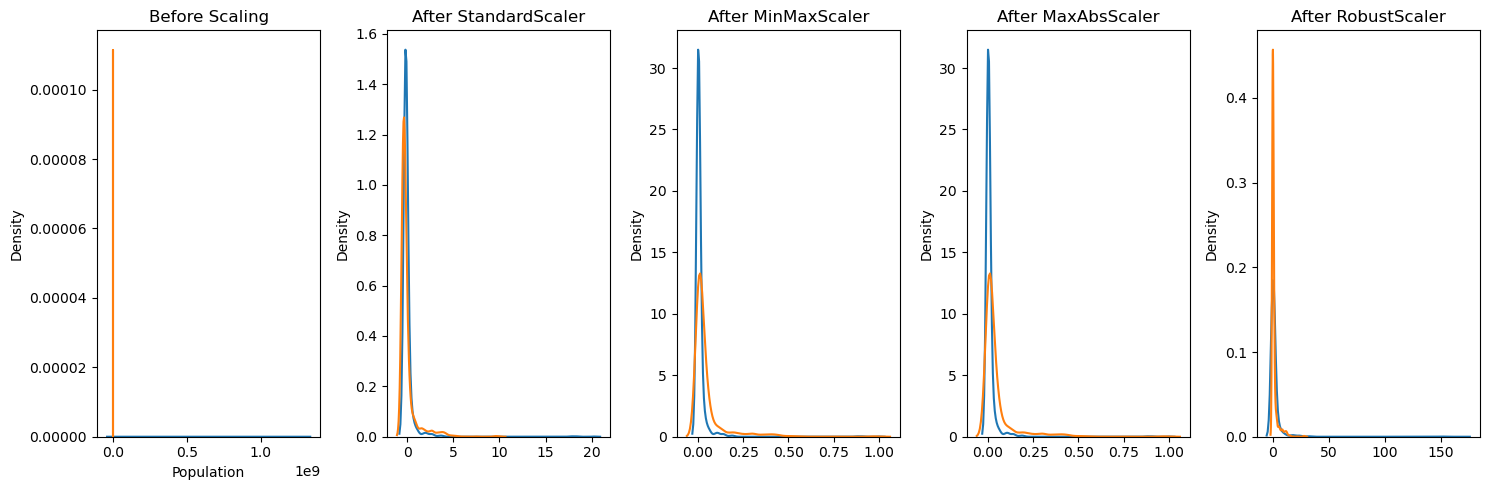

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler, RobustScaler

column_to_scale = ['Population', 'GDP']

missing_columns = [col for col in column_to_scale if col not in df.columns]
if missing_columns:
    raise ValueError(f"The following columns are missing in the DataFrame: {missing_columns}")

scalers = {
    'StandardScaler': StandardScaler(),
    'MinMaxScaler': MinMaxScaler(),
    'MaxAbsScaler': MaxAbsScaler(),
    'RobustScaler': RobustScaler()
}

fig, axes = plt.subplots(ncols=len(scalers) + 1, figsize=(15, 5))

axes[0].set_title('Before Scaling')
for col in column_to_scale:
    sns.kdeplot(df[col], ax=axes[0])

for i, (scaler_name, scaler) in enumerate(scalers.items(), start=1):
    scaled_df = scaler.fit_transform(df[column_to_scale])
    axes[i].set_title(f'After {scaler_name}')
    for j, col in enumerate(column_to_scale):
        sns.kdeplot(scaled_df[:, j], ax=axes[i])

plt.tight_layout()
plt.show()

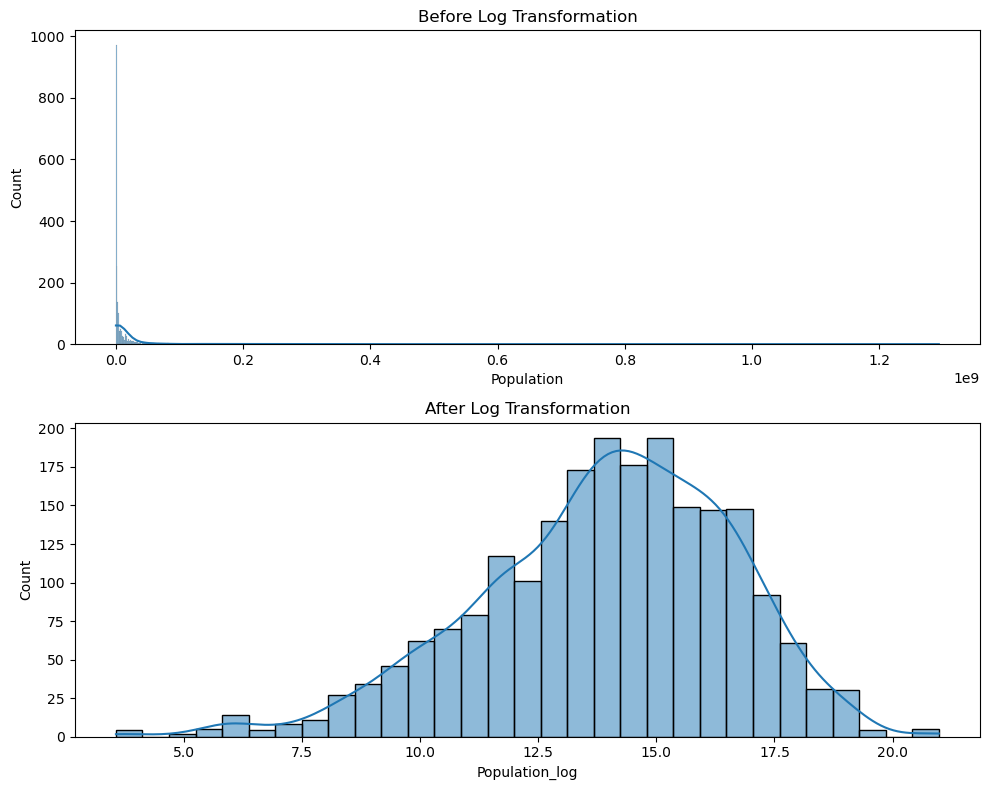

In [35]:
df['Population_log'] = np.log1p(df['Population'])

fig, axes = plt.subplots(nrows=2, figsize=(10, 8))

axes[0].set_title('Before Log Transformation')
sns.histplot(df['Population'], kde=True, ax=axes[0])

axes[1].set_title('After Log Transformation')
sns.histplot(df['Population_log'], kde=True, ax=axes[1])

plt.tight_layout()
plt.show()

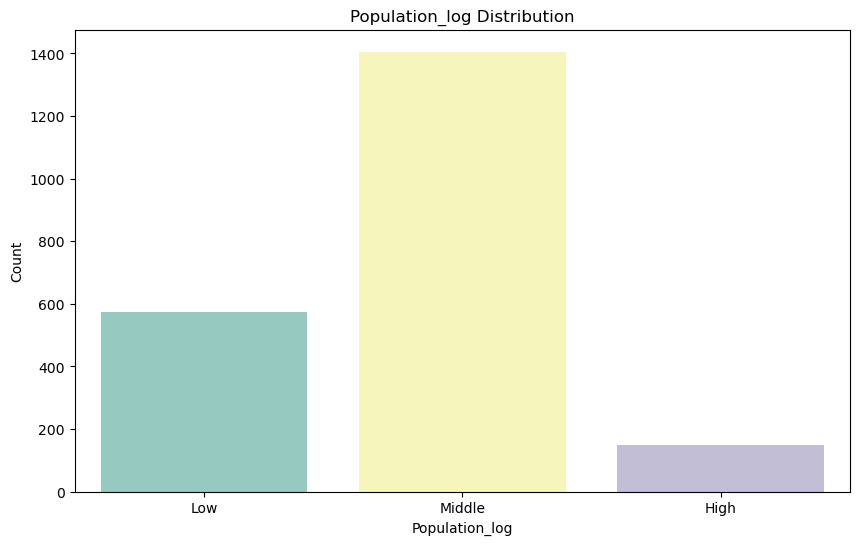

In [36]:
df['Population_log'] = pd.cut(df['Population_log'], bins=[0, 12.5, 17.5, np.inf], labels=['Low', 'Middle', 'High'])

plt.figure(figsize=(10,6))

sns.countplot(data=df, x='Population_log', order=['Low', 'Middle', 'High'], palette="Set3")

plt.title('Population_log Distribution')
plt.xlabel('Population_log')
plt.ylabel('Count')
plt.show()

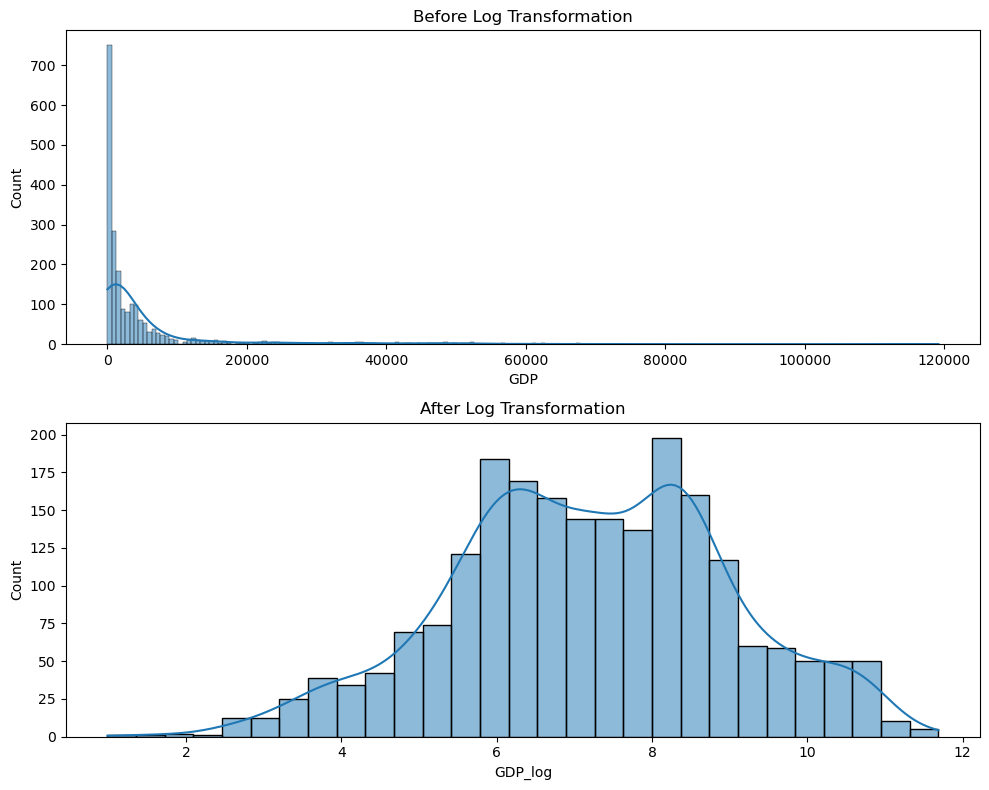

In [37]:
df['GDP_log'] = np.log1p(df['GDP'])

fig, axes = plt.subplots(nrows=2, figsize=(10, 8))

axes[0].set_title('Before Log Transformation')
sns.histplot(df['GDP'], kde=True, ax=axes[0])

axes[1].set_title('After Log Transformation')
sns.histplot(df['GDP_log'], kde=True, ax=axes[1])

plt.tight_layout()
plt.show()

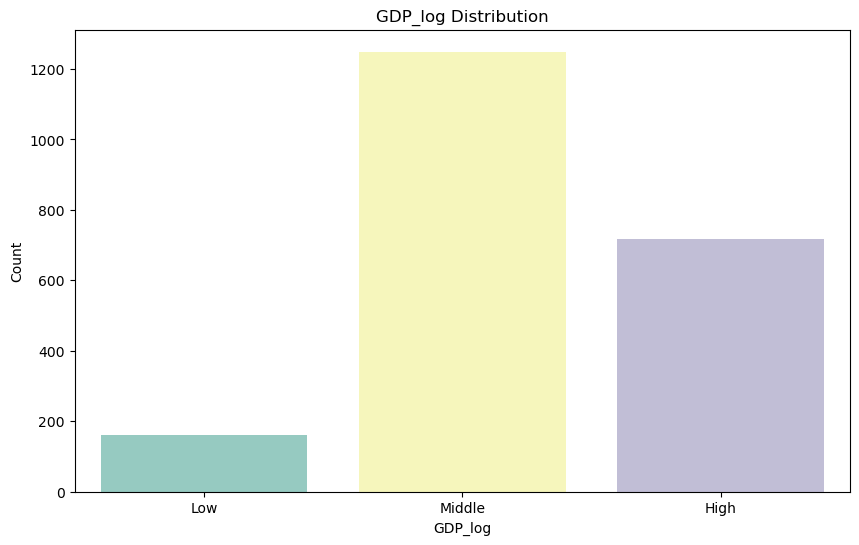

In [38]:
df['GDP_log'] = pd.cut(df['GDP_log'], bins=3, labels=['Low', 'Middle', 'High'])

plt.figure(figsize=(10,6))

sns.countplot(data=df, x='GDP_log', order=['Low', 'Middle', 'High'], palette="Set3")

plt.title('GDP_log Distribution')
plt.xlabel('GDP_log')
plt.ylabel('Count')

plt.show()

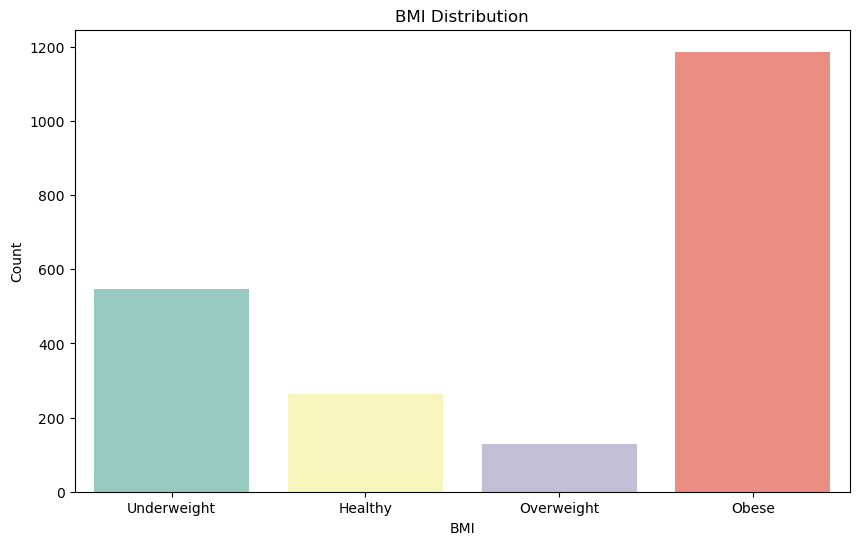

In [39]:
bins = [0, 18.5, 24.9, 29.9, np.inf]
labels = ['Underweight', 'Healthy', 'Overweight', 'Obese']

df['BMI'] = pd.cut(df['BMI'], bins=bins, labels=labels)

plt.figure(figsize=(10,6))

sns.countplot(data=df, x='BMI', order=['Underweight', 'Healthy', 'Overweight', 'Obese'], palette="Set3")

plt.title('BMI Distribution')
plt.xlabel('BMI')
plt.ylabel('Count')
plt.show()

In [40]:
df['Status'] = df['Status'].astype('category')

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2128 entries, 15 to 2922
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   Country                 2128 non-null   object  
 1   Year                    2128 non-null   int64   
 2   Status                  2128 non-null   category
 3   Life expectancy         2128 non-null   float64 
 4   Adult Mortality         2128 non-null   float64 
 5   infant deaths           2128 non-null   int64   
 6   Alcohol                 2128 non-null   float64 
 7   percentage expenditure  2128 non-null   float64 
 8   Hepatitis B             2128 non-null   float64 
 9   Measles                 2128 non-null   int64   
 10  BMI                     2128 non-null   category
 11  under-five deaths       2128 non-null   int64   
 12  Polio                   2128 non-null   float64 
 13  Total expenditure       2128 non-null   float64 
 14  Diphtheria              2128

In [42]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder

def encode_column(df, column_name, new_column_name):
    X = df[column_name].values.reshape(-1, 1)
    enc = OrdinalEncoder()  
    df[new_column_name] = enc.fit_transform(X).ravel()
    return df

columns_to_encode = {
    'Status': 'Status_encoded',
    'BMI': 'BMI_encoded',
    'GDP_log': 'GDP_log_encoded',
    'Population_log': 'Population_log_encoded'
}

for original_column, new_column in columns_to_encode.items():
    df = encode_column(df, original_column, new_column)

def print_encoded_values(df, column_name):
    X = df[column_name].values.reshape(-1, 1)
    enc = OneHotEncoder(sparse=False)
    onehotlabels = enc.fit_transform(X)

    for orig, encoded in zip(df[column_name][90:100], onehotlabels[90:100]):
        print(f'Original: {orig}, Encoded: {encoded}')

columns_to_encode = ['Status', 'BMI', 'GDP_log', 'Population_log']

for column in columns_to_encode:
    print(f"Encoding results for {column}:")
    print_encoded_values(df, column)
    print("\n")

Encoding results for Status:
Original: Developing, Encoded: [0. 1.]
Original: Developing, Encoded: [0. 1.]
Original: Developing, Encoded: [0. 1.]
Original: Developing, Encoded: [0. 1.]
Original: Developing, Encoded: [0. 1.]
Original: Developing, Encoded: [0. 1.]
Original: Developed, Encoded: [1. 0.]
Original: Developed, Encoded: [1. 0.]
Original: Developed, Encoded: [1. 0.]
Original: Developed, Encoded: [1. 0.]


Encoding results for BMI:
Original: Obese, Encoded: [0. 1. 0. 0.]
Original: Obese, Encoded: [0. 1. 0. 0.]
Original: Obese, Encoded: [0. 1. 0. 0.]
Original: Obese, Encoded: [0. 1. 0. 0.]
Original: Obese, Encoded: [0. 1. 0. 0.]
Original: Obese, Encoded: [0. 1. 0. 0.]
Original: Obese, Encoded: [0. 1. 0. 0.]
Original: Obese, Encoded: [0. 1. 0. 0.]
Original: Obese, Encoded: [0. 1. 0. 0.]
Original: Underweight, Encoded: [0. 0. 0. 1.]


Encoding results for GDP_log:
Original: Middle, Encoded: [0. 0. 1.]
Original: High, Encoded: [1. 0. 0.]
Original: High, Encoded: [1. 0. 0.]
Original:

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2128 entries, 15 to 2922
Data columns (total 26 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   Country                 2128 non-null   object  
 1   Year                    2128 non-null   int64   
 2   Status                  2128 non-null   category
 3   Life expectancy         2128 non-null   float64 
 4   Adult Mortality         2128 non-null   float64 
 5   infant deaths           2128 non-null   int64   
 6   Alcohol                 2128 non-null   float64 
 7   percentage expenditure  2128 non-null   float64 
 8   Hepatitis B             2128 non-null   float64 
 9   Measles                 2128 non-null   int64   
 10  BMI                     2128 non-null   category
 11  under-five deaths       2128 non-null   int64   
 12  Polio                   2128 non-null   float64 
 13  Total expenditure       2128 non-null   float64 
 14  Diphtheria              2128

# Task 01 - Regression

In [64]:
columns_to_drop = ['Status_encoded', 'BMI_encoded', 'GDP_log_encoded', 'Population_log_encoded', 'Life expectancy']
x = df[df.select_dtypes(include='number').columns].drop(columns_to_drop, axis=1)
y = df["Life expectancy"]

In [65]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

In [66]:
scaler = MinMaxScaler()

In [67]:
x_train_scaled = scaler.fit_transform(x_train)

In [68]:
x_test_scaled = scaler.transform(x_test)

In [69]:
x_train_scaled.shape

(1596, 16)

In [70]:
model = Sequential()

model.add(Dense(28,input_shape=(16,),activation='relu', kernel_regularizer=regularizers.L1L2(l1=1e-3, l2=1e-2),
    bias_regularizer=regularizers.L2(1e-3),
    activity_regularizer=regularizers.L2(1e-4)))

model.add(Dense(56,activation='relu'))
model.add(Dense(42,activation='relu'))
model.add(Dense(35,activation='relu'))
model.add(Dense(20,activation='relu'))
model.add(Dense(1))

In [71]:
model.compile(optimizer='Adam',loss='mse',metrics=['mae'])

In [72]:
model.fit(x=x_train_scaled,y=y_train.values,validation_data=(x_test_scaled,y_test.values),batch_size=128,epochs=100)

Epoch 1/100
13/13 [==============================] - 1s 27ms/step - loss: 4614.4233 - mae: 67.2729 - val_loss: 4452.5093 - val_mae: 65.9685
Epoch 2/100
13/13 [==============================] - 0s 17ms/step - loss: 4390.7437 - mae: 65.5949 - val_loss: 4152.7275 - val_mae: 63.6716
Epoch 3/100
13/13 [==============================] - 0s 16ms/step - loss: 3931.6135 - mae: 61.9894 - val_loss: 3441.5537 - val_mae: 57.8537
Epoch 4/100
13/13 [==============================] - 0s 16ms/step - loss: 2930.2266 - mae: 53.2220 - val_loss: 2059.0400 - val_mae: 44.3432
Epoch 5/100
13/13 [==============================] - 0s 16ms/step - loss: 1276.4460 - mae: 33.5648 - val_loss: 373.2760 - val_mae: 16.8088
Epoch 6/100
13/13 [==============================] - 0s 16ms/step - loss: 232.4842 - mae: 12.2077 - val_loss: 297.2197 - val_mae: 13.9625
Epoch 7/100
13/13 [==============================] - 0s 16ms/step - loss: 208.6613 - mae: 11.3617 - val_loss: 158.7442 - val_mae: 9.6456
Epoch 8/100
13/13 [=======

In [73]:
losses=pd.DataFrame(model.history.history)
losses.tail()

,loss,mae,val_loss,val_mae
95,26.000978,3.808786,29.774235,4.151348
96,26.169292,3.802421,29.500143,4.092948
97,25.830347,3.776794,29.543697,4.113226
98,25.778616,3.791030,29.487892,4.090499
99,25.761425,3.796297,29.223886,4.091929


<Axes: >

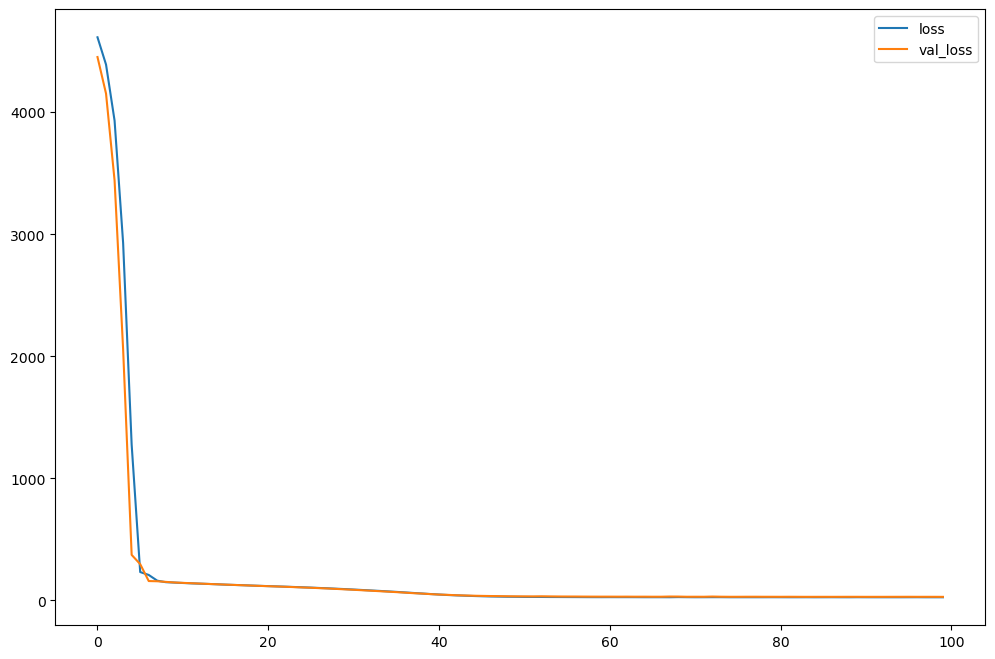

In [74]:
losses[['loss','val_loss']].plot(figsize=(12,8))

<Axes: >

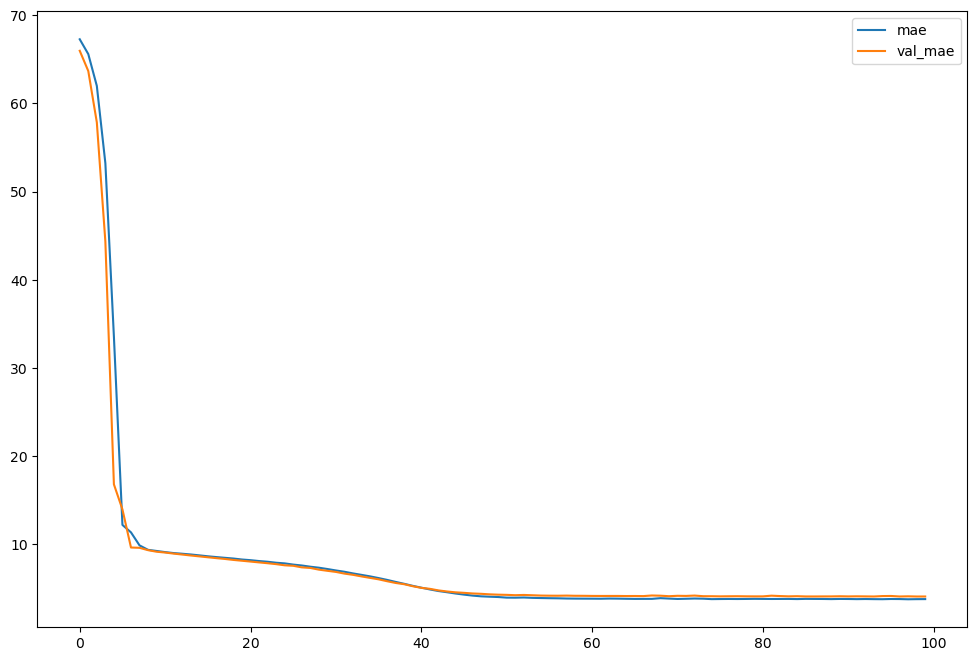

In [75]:
losses[['mae','val_mae']].plot(figsize=(12,8))

In [76]:
predictions = model.predict(x_test_scaled)

17/17 [==============================] - 0s 2ms/step


In [77]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
mean_abs_error = mean_absolute_error(predictions,y_test)
mean_abs_error

4.091929237107585

In [78]:
np.sqrt(mean_squared_error(y_test,predictions))

5.383079946090857

In [79]:
model.evaluate(x_test_scaled,y_test)

17/17 [==============================] - 0s 12ms/step - loss: 29.2239 - mae: 4.0919


[29.223886489868164, 4.0919294357299805]

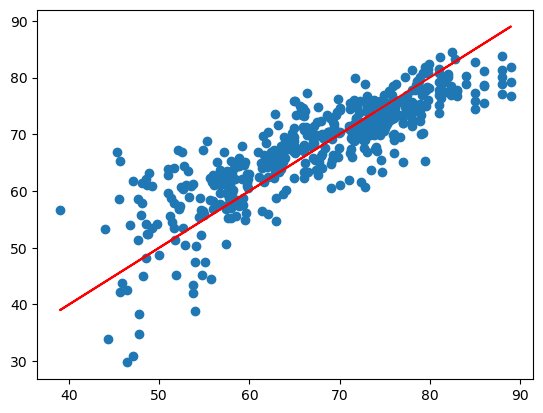

In [80]:
plt.scatter(y_test,predictions)
plt.plot(y_test,y_test,'r')

# Task 02 - Classification

In [87]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

features = ['Life expectancy', 'BMI_encoded', 'Population_log_encoded', 'GDP_log_encoded']
target = 'Status'

X = df[features]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy: 0.8615023474178404
Precision: 0.8558634136329818
Recall: 0.8615023474178404
F1-score: 0.858354092333893


In [88]:
comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
comparison_df.head(10)

,Actual,Predicted
357,Developing,Developing
2712,Developing,Developing
2270,Developing,Developing
1301,Developing,Developed
2726,Developing,Developing
390,Developed,Developing
2302,Developing,Developing
870,Developing,Developing
89,Developing,Developing
397,Developed,Developing


In [89]:
from sklearn.metrics import confusion_matrix, classification_report

confusion = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(confusion)

report = classification_report(y_test, y_pred)
print('\nClassification Report:')
print(report)

Confusion Matrix:
[[ 34  33]
 [ 26 333]]

Classification Report:
              precision    recall  f1-score   support

   Developed       0.57      0.51      0.54        67
  Developing       0.91      0.93      0.92       359

    accuracy                           0.86       426
   macro avg       0.74      0.72      0.73       426
weighted avg       0.86      0.86      0.86       426



# Task 03 - Clustering

In [90]:
from sklearn.cluster import KMeans
from sklearn.model_selection import ParameterGrid
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

features = ['Adult Mortality', 'infant deaths', 'Alcohol', 'Hepatitis B', 
               'Measles', 'BMI_encoded', 'under-five deaths', 'Polio', 
               'Diphtheria', 'HIV/AIDS', 'thinness 10-19 years', 'thinness 5-9 years']

X = df[features]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

param_grid = {'n_clusters': list(range(2, 15)), 
              'init': ['k-means++', 'random'], 
              'n_init': [10, 20, 30], 
              'max_iter': [300, 600, 900]}

grid = ParameterGrid(param_grid)

results = []

for params in grid:
    kmeans = KMeans(**params, random_state=42)
    kmeans.fit(X_scaled)
    
    labels = kmeans.labels_
    silhouette_avg = silhouette_score(X_scaled, labels)
    
    results.append({**params, 'Silhouette Score': silhouette_avg})

results_df = pd.DataFrame(results)

sorted_results_df = results_df.sort_values(by='Silhouette Score', ascending=False)

sorted_results_df.head(5)

,init,max_iter,n_clusters,n_init,Silhouette Score
0,k-means++,300,2,10,0.320058
39,k-means++,600,2,10,0.320058
197,random,900,2,30,0.320058
196,random,900,2,20,0.320058
195,random,900,2,10,0.320058


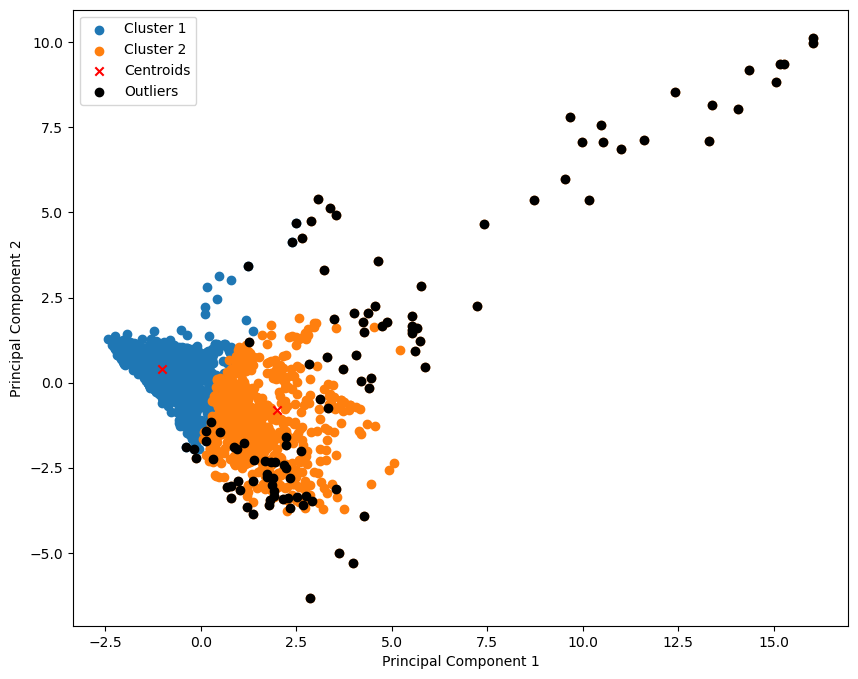

In [91]:
from sklearn.decomposition import PCA

best_params = sorted_results_df.iloc[0].drop('Silhouette Score').to_dict()

kmeans = KMeans(**best_params, random_state=42)
kmeans.fit(X_scaled)

labels = kmeans.labels_
centroids = kmeans.cluster_centers_

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
centroids_2D = pca.transform(centroids)

distances = np.linalg.norm(X_scaled - centroids[labels], axis=1)

threshold = np.percentile(distances, 95)

plt.figure(figsize=(10, 8))
for i in range(best_params['n_clusters']):
    plt.scatter(X_pca[labels == i, 0], X_pca[labels == i, 1], label=f'Cluster {i+1}')
plt.scatter(centroids_2D[:, 0], centroids_2D[:, 1], c='red', marker='x', label='Centroids')

outliers = X_pca[distances > threshold]
plt.scatter(outliers[:, 0], outliers[:, 1], c='black', marker='o', label='Outliers')

plt.legend()
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()